## Ejercicio 3.19
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_3.19.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

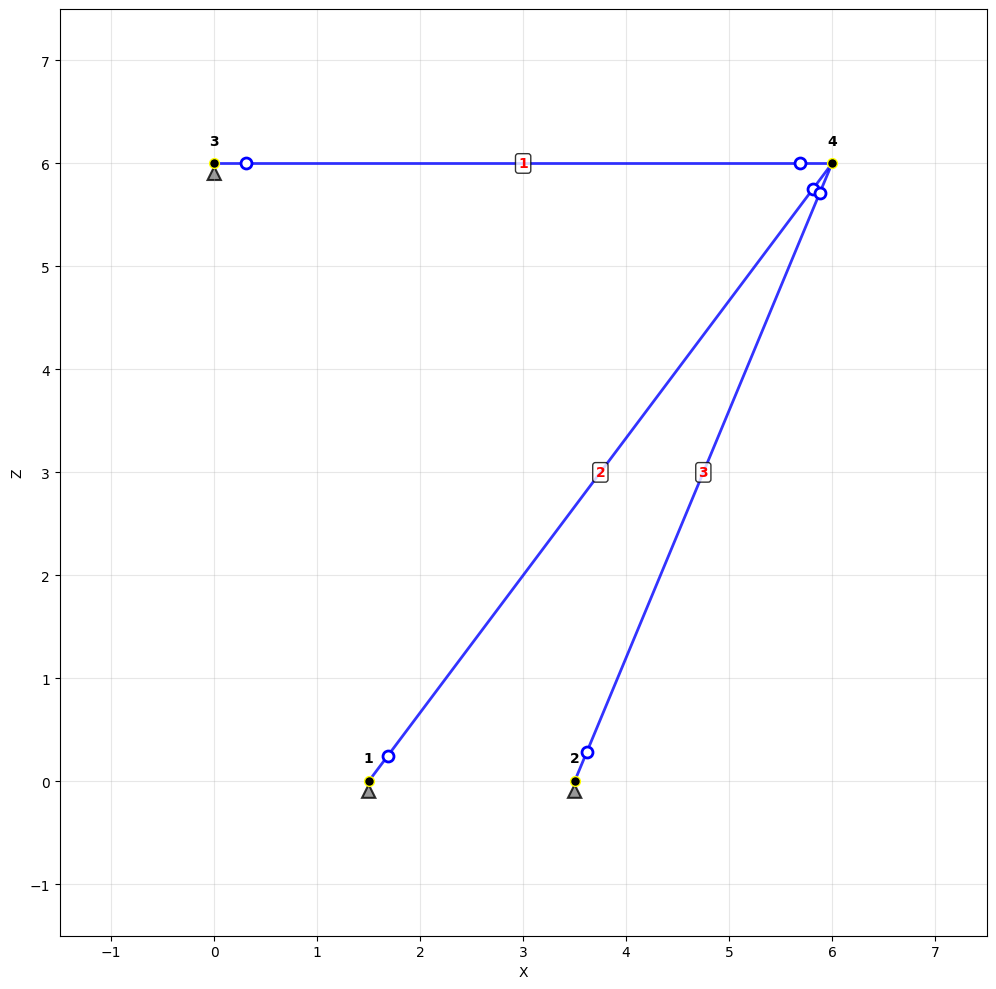

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 10 ** 6
A = 3480 *10**-6
I = 1

# Definición de Nodos (Geometría)
system.defineNode(1, x=1.5, z=0)
system.defineNode(2, x=3.5, z=0)
system.defineNode(3, x=0, z=6)
system.defineNode(4, x=6, z=6)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=False)
system.assignJoint.restrictions(2, ux=True, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=True, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 3, 4, A=A, E=E, I=I)
system.defineElement(2, 1, 4, A=A, E=E, I=I)
system.defineElement(3, 2, 4, A=A, E=E, I=I)

# Asignación de Cargas
system.assignJoint.force(4, fx=0, fz=-480, my=0)

# Configuración de Liberaciones en Elementos
system.assignElement.releases(1, start=True, end=True)
system.assignElement.releases(2, start=True, end=True)
system.assignElement.releases(3, start=True, end=True)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 4
Número de elementos: 3
Grados de libertad totales: 12
Grados de libertad restringidos (desplazamientos conocidos): 10 de 12
GL restringidos: [ 0  1  2  3  4  5  6  7  8 11]
Grados de libertad libres (fuerzas conocidas): 2 de 12
GL libres: [ 9 10]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (2x2):
  |         9 |         10 |

  |     165248 |      82559 |
  |      82559 |     150629 |
 
KAB (2x10):
  |         0 |          1 |          2 |          3 |          4 |          5 |          6 |          7 |          8 |         11 |
 
  |     -33408 |     -44544 |          0 |     -15840 |     -38015 |          0 |    -116000 |          0 |

In [4]:
# Obtención de Resultados de nodos y elementos
system.getResults()

RESULTADOS DE NODOS

Node 1: (1.5, 0) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=-5.8511e-04
  Fuerzas: Fx=122.228, Fz=162.970, My=0.000

Node 2: (3.5, 0) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=-6.7512e-04
  Fuerzas: Fx=132.096, Fz=317.030, My=0.000

Node 3: (0, 6) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=-7.3138e-04
  Fuerzas: Fx=-254.323, Fz=0.000, My=0.000

Node 4: (6, 6) - Libre
  Desplazamientos: Ux=2.1924e-03, Uz=-4.3883e-03, Ry=0.0000e+00
  Fuerzas: Fx=0.000, Fz=-480.000, My=0.000

RESULTADOS DE ELEMENTOS

--------------------------------------------------------------------------------
ELEMENTO 1: [3, 4]  - Tipo 3
--------------------------------------------------------------------------------
FUERZAS DE EMPOTRAMIENTO PERFECTO FEF:
  |       Fxi |        Fzi |        Myi |        Fxj |        Fzj |        Myj |
  |     0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |

FUERZAS INTERNAS:
  |       Fxi | 

In [5]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [3, 4]  - Tipo 3
PROPIEDADES
  Longitud: 6.000
  Área (A): 3.4800e-03
  Módulo elástico (E): 2.0000e+08
  Momento de inercia (I): 1.0000e+00
  Liberaciones:  Nodo i = SÍ | Nodo j = SÍ
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 116000.000 |      0.000 |      0.000 | -116000.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |


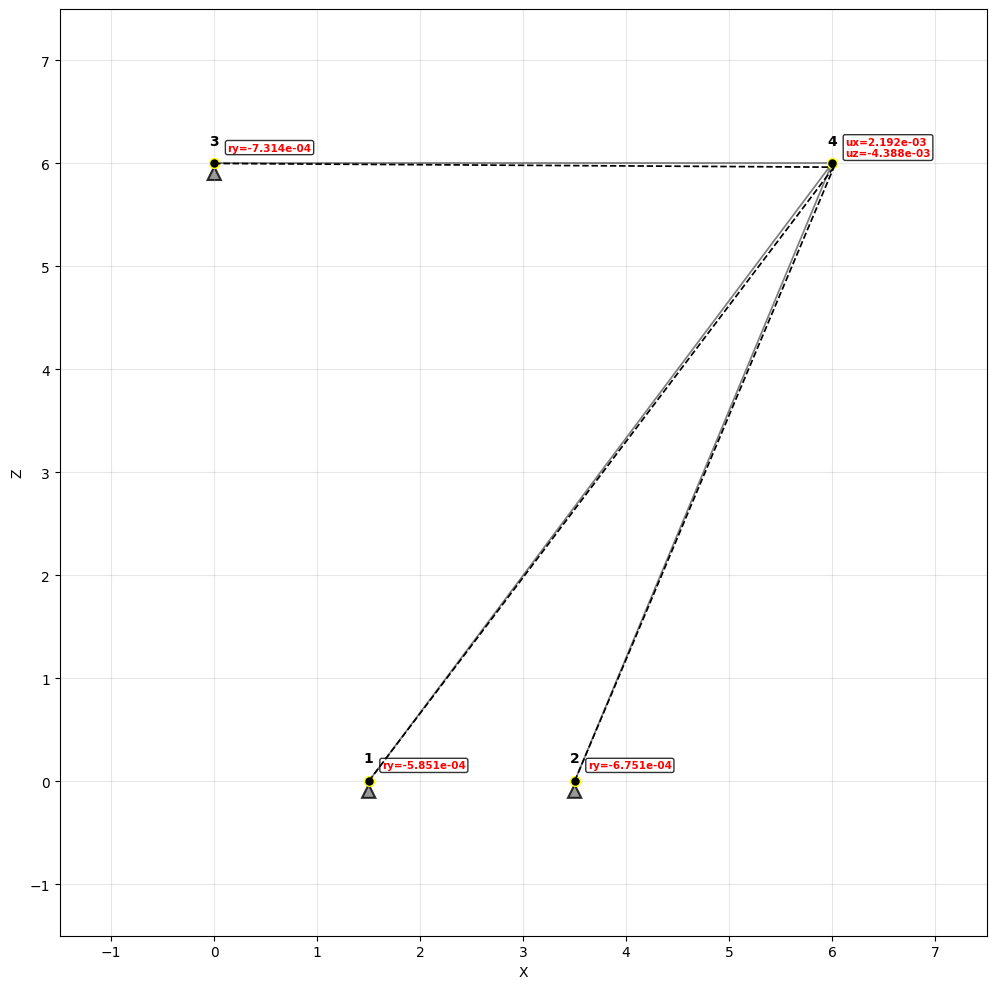

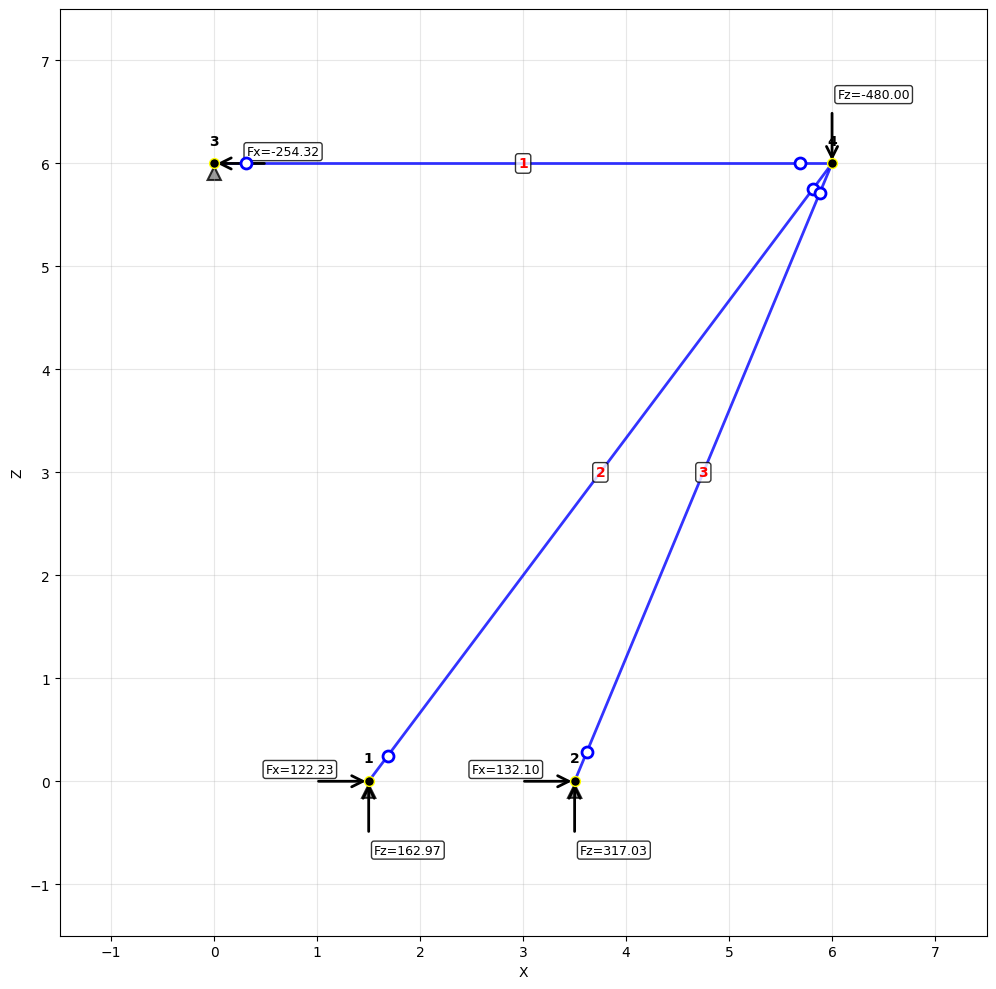

In [8]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.01)
plotter.showReactions()

### Comprobación con SAP2000

![](img/ejercicio_3.19_sap.png)